In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from dateutil import parser
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from itertools import combinations

sns.set()

In [319]:
data = pd.read_csv('XYZ_sports_dataset.csv', sep=";", index_col="ID")

In [320]:
data.index = data.index - 10000

In [321]:
pd.set_option('display.max_columns', None)
data.head(20)

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
5,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,29,Male,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,212.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1


In [322]:
data.shape

(14942, 30)

In [323]:
data.dtypes         # object types can have multiple things

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRene

In [324]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfReferences              0
Dropout       

In [325]:
total = data.isna().sum().tolist()
data.describe(include="all").T["count"] + total - len(data)

# it either has a value / date or NaN. Nothing else on the dataset

Age                           0.0
Gender                          0
Income                        0.0
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency          0.0
LifetimeValue                 0.0
UseByTime                     0.0
AthleticsActivities           0.0
WaterActivities               0.0
FitnessActivities             0.0
DanceActivities               0.0
TeamActivities                0.0
RacketActivities              0.0
CombatActivities              0.0
NatureActivities              0.0
SpecialActivities             0.0
OtherActivities               0.0
NumberOfFrequencies           0.0
AttendedClasses               0.0
AllowedWeeklyVisitsBySLA      0.0
AllowedNumberOfVisitsBySLA    0.0
RealNumberOfVisits            0.0
NumberOfRenewals              0.0
HasReferences                 0.0
NumberOfReferences            0.0
Dropout       

In [326]:
# For the types of activities

print("AthleticsActivities:", (data["AthleticsActivities"] == 1.0).sum())
print("WaterActivities:", (data["WaterActivities"] == 1.0).sum())
print("FitnessActivities:", (data["FitnessActivities"] == 1.0).sum())
print("DanceActivities:", (data["DanceActivities"] == 1.0).sum())
print("TeamActivities:", (data["TeamActivities"] == 1.0).sum())
print("RacketActivities :", (data["RacketActivities"] == 1.0).sum())
print("CombatActivities :", (data["CombatActivities"] == 1.0).sum())
print("NatureActivities:", (data["NatureActivities"] == 1.0).sum())
print("SpecialActivities:", (data["SpecialActivities"] == 1.0).sum())
print("OtherActivities:", (data["OtherActivities"] == 1.0).sum())

AthleticsActivities: 110
WaterActivities: 4415
FitnessActivities: 8587
DanceActivities: 0
TeamActivities: 828
RacketActivities : 349
CombatActivities : 1609
NatureActivities: 0
SpecialActivities: 395
OtherActivities: 28


In [327]:
# So we can just take out the ones with 0 occurences right? They have nans but ratio is very small. Good enough aproximation

data = data.drop(["DanceActivities","NatureActivities"], axis=1)
data.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [328]:
# 'hasreferences' is useless because we have 'numberofreferences'

data = data.drop(["HasReferences"], axis=1)
data.head(8)

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0,0
1,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0,1
2,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0,1
3,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0,1
4,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0,1
5,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0,7.0,59.01,26,0,0,1
6,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,143.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0,7.0,30.03,3,3,0,1
7,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,233.90,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,0,7.0,60.97,11,5,0,1


In [329]:
data['DateLastVisit'] = pd.to_datetime(data['DateLastVisit'])

# Filter data excluding dates from the year 2019
filtered_data = data[data['DateLastVisit'].dt.year != 2019]

filtered_data['Month'] = filtered_data['DateLastVisit'].dt.month
monthly_counts = filtered_data['Month'].value_counts().sort_index()
print(monthly_counts)

# This could be useful information in the future. The months people tend more to go for the last time

Month
1      422
2      489
3      912
4      987
5     1388
6     1276
7     1366
8       36
9      283
10     912
11    1186
12     704
Name: count, dtype: int64


C:\Users\jaime\AppData\Local\Temp\ipykernel_7892\2415785095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = filtered_data['DateLastVisit'].dt.month


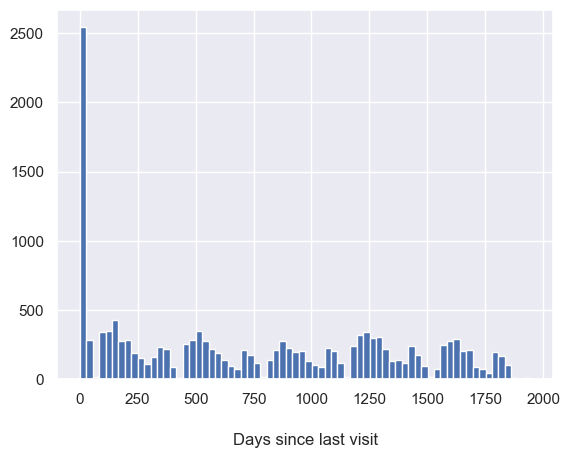

In [330]:
days_since_last_visit = []
date2_str = "2019-10-31"          # end day for data collection

for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"DateLastVisit"]))
    date2 = parser.parse(str(date2_str))
    days_since_last_visit.append((date2 - date1).days)
    
plt.hist(days_since_last_visit, bins=70)  
plt.title("Days since last visit", y=-0.2)
plt.show()

In [331]:
# easier to work with number of days rather than a date

data = data.drop(["DateLastVisit"], axis=1)
data["days_since_last_visit"] = days_since_last_visit

In [332]:
# now the same thing but for enrollment and period. We take out 2 columns with this and get rid of dates

In [333]:
enrolled_time = []
for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"EnrollmentFinish"]))
    date2 = parser.parse(str(data.loc[i,"EnrollmentStart"]))
    enrolled_time.append((date1 - date2).days)    # WRONG, CAN STILL BE ENROLED


lastperiod_time = []
for i in range(len(data)):
    
    date1 = parser.parse(str(data.loc[i,"LastPeriodFinish"]))
    date2 = parser.parse(str(data.loc[i,"LastPeriodStart"]))
    lastperiod_time.append((date1 - date2).days)

In [334]:
data = data.drop(["EnrollmentStart","EnrollmentFinish","LastPeriodStart","LastPeriodFinish"], axis=1)
data["enrolled_time"] = enrolled_time
data["lastperiod_time"] = lastperiod_time

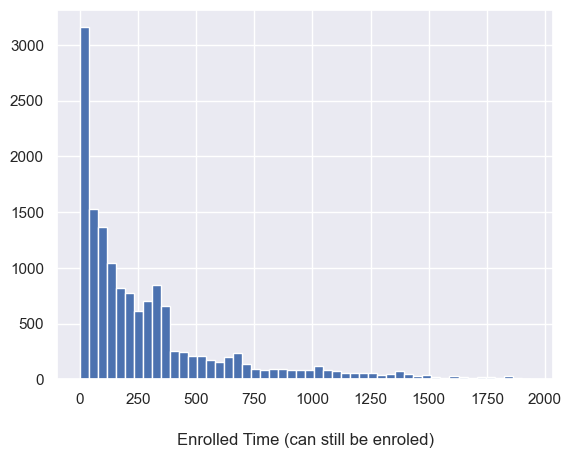

In [335]:
plt.hist(enrolled_time, bins=50)  
plt.title("Enrolled Time (can still be enroled)", y=-0.2)
plt.show()

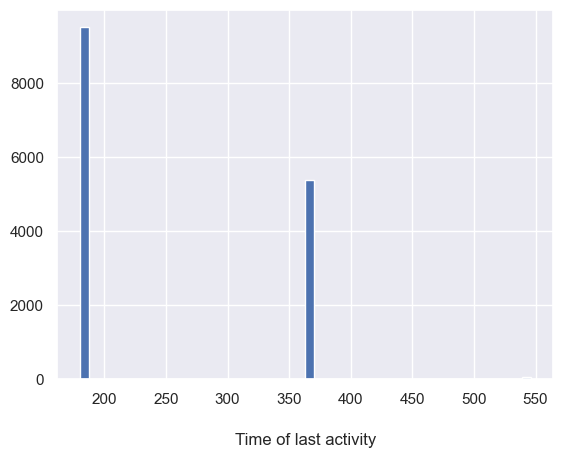

In [336]:
plt.hist(lastperiod_time, bins=50)  
plt.title("Time of last activity", y=-0.2)
plt.show()

# this has to do with the 2 month thing. need to understand wtf is going on

In [337]:
data["lastperiod_time"].value_counts()

lastperiod_time
183    5163
364    3832
180    3584
365    1553
181     753
546      57
Name: count, dtype: int64

In [338]:
# make gender column numerical

gender_numerical = []
gender_function = {'Male': 0, 'Female': 1}

for gender in data["Gender"]:
    gender_numerical.append(gender_function[gender])
    
data["Gender"] = gender_numerical

In [339]:
data.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time
ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,60,1,5500.0,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0,0,1,58,183
1,29,1,2630.0,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0,1,1568,398,364
2,23,0,1980.0,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0,1,889,30,180
3,9,0,0.0,22,155.40,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0,1,283,160,364
4,35,0,4320.0,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0,1,721,778,180


In [340]:
data = data.astype(float)

In [341]:
data.isna().sum()

Age                             0
Gender                          0
Income                        495
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
TeamActivities                 35
RacketActivities               37
CombatActivities               33
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
NumberOfReferences              0
Dropout                         0
days_since_last_visit           0
enrolled_time                   0
lastperiod_time                 0
dtype: int64

In [342]:
# Dealing with nan values
# then check correlation matrix between parameters

In [343]:
# atribute 0 income if is nan and under 18 years old. seems fair

for index, row in data.iterrows():
    if pd.isna(row['Income']) and row["Age"] < 18:
        data.at[index,"Income"] = 0.0

In [344]:
data['Income'].isna().sum()         # very good improvement. most NaN were in this situation

132

In [345]:
# After make the same analysis to deal with nan values for the other variables.
# we can probably still drop some columns before checking the correlation metrix
# and then deal with the outliers as well

# all this is just for the first point of the guidelines pdf

In [346]:
data_neighbors_income = data.copy()
data_neighbors_income['Income'].isna().sum()

132

In [347]:
# Create age groups

bins = [0, 18, 25, 35, 55, np.inf]  # Define age group boundaries
labels = ['Children', 'Young Adults', 'Adults', 'Middle-Aged', 'Seniors']
data_neighbors_income['AgeGroup'] = pd.cut(data_neighbors_income['Age'], bins=bins, labels=labels, include_lowest=True)

C:\Users\jaime\AppData\Local\Temp\ipykernel_7892\1903272434.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_neighbors_income['Income'].fillna(data_neighbors_income.groupby('AgeGroup')['Income'].transform('mean'), inplace=True)


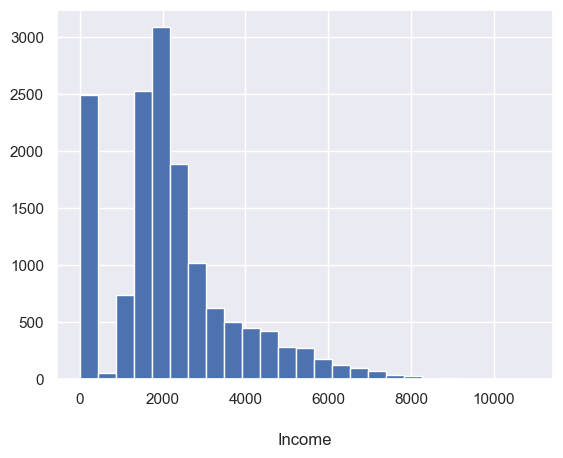

In [348]:
data_neighbors_income['Income'].fillna(data_neighbors_income.groupby('AgeGroup')['Income'].transform('mean'), inplace=True)

plt.hist(data_neighbors_income["Income"], bins=25)  
plt.title("Income", y=-0.2)
plt.show()

In [349]:
data_neighbors_income["AllowedWeeklyVisitsBySLA"].value_counts()
# This feature can be deleted later but for now trying with

# So, each one should be a different program right?

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [350]:
data_neighbors_income['AllowedWeeklyVisitsBySLA'][data_neighbors_income['UseByTime'] == 1].isna().sum()

14

In [351]:
data_neighbors_income['UseByTime'].value_counts()

UseByTime
0.0    14238
1.0      704
Name: count, dtype: int64

In [352]:
data_neighbors_income[data_neighbors_income['UseByTime'] == 1]['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    660
2.0     12
4.0      6
3.0      5
1.0      5
6.0      1
5.0      1
Name: count, dtype: int64

In [353]:
# Replace the Nans in Allowed by 7.0 if UseByTime is 1
data_neighbors_income.loc[data_neighbors_income['UseByTime'] == 1, 'AllowedWeeklyVisitsBySLA'] = data_neighbors_income.loc[data_neighbors_income['UseByTime'] == 1, 'AllowedWeeklyVisitsBySLA'].fillna(7.0)

In [355]:
data_neighbors_income['AllowedWeeklyVisitsBySLA'].isna().sum()

521

In [ ]:
# 7.0 -> 72.9% 
# 6.0 -> 0.82% 
# 4.0 -> 5.2%  
# 3.0 -> 1.1%  
# 2.0 -> 16.3%
# 1.0 -> 3.6%  

In [356]:
# Filling the missing values

allowed_indexes = data_neighbors_income.index[data_neighbors_income['AllowedWeeklyVisitsBySLA'].isna()].tolist()
np.random.shuffle(allowed_indexes)

for index in allowed_indexes[:380]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 7.0
for index in allowed_indexes[380:380 + 4]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 6.0
for index in allowed_indexes[380 + 4:380 + 4 + 28]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 4.0
for index in allowed_indexes[380 + 4 + 28:380 + 4 + 28 + 6]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 3.0
for index in allowed_indexes[380 + 4 + 28 + 6:380 + 4 + 28 + 6 + 86]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 2.0
for index in allowed_indexes[380 + 4 + 28 + 6 + 86:380 + 4 + 28 + 6 + 86 + 17]:
    data_neighbors_income.at[index, 'AllowedWeeklyVisitsBySLA'] = 1.0


In [357]:
data_neighbors_income['laziness_index'] = 1 - (data_neighbors_income['RealNumberOfVisits'] / data_neighbors_income['AllowedNumberOfVisitsBySLA'])

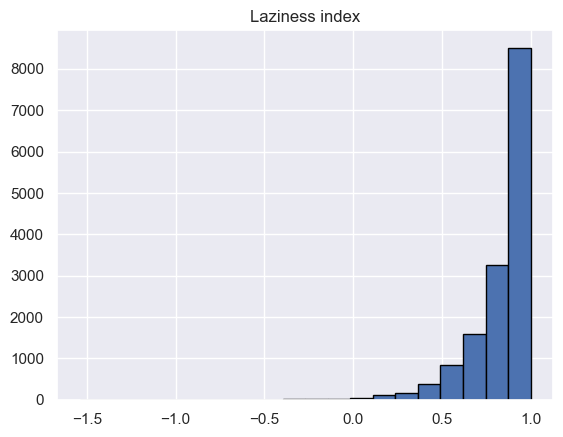

In [361]:
plt.hist(data_neighbors_income['laziness_index'], bins=20, edgecolor='black')
plt.title('Laziness index')
plt.show()

In [ ]:
# NEGATIVE VALUES SHOULD BE IMPOSSIBLE! REAL NUMBER OF VISITS > ALLOWED NUMBER OF VISITS ; need to look into this.

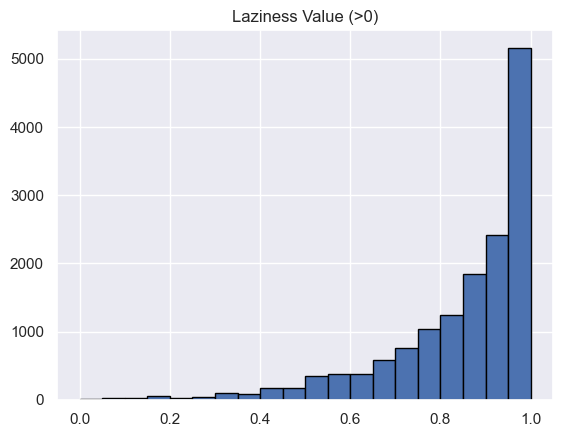

In [362]:
filtered_data = data_neighbors_income[data_neighbors_income['laziness_index'] >= 0.0]

plt.hist(filtered_data['laziness_index'], bins=20, edgecolor='black')
plt.title('Laziness Value (>0)')
plt.show()

In [363]:
# Conclusion: people are lazy af. Also, many people can go whenever...

In [364]:
# "NumberOfFrequencies" has very few nan so going to fill with the mean of all values.
# probably not the best but for now will do

In [365]:
mean_frequencies = data_neighbors_income["NumberOfFrequencies"].mean()

In [366]:
data_neighbors_income["NumberOfFrequencies"].fillna(mean_frequencies, inplace=True)

In [367]:
data = data_neighbors_income

data.head(8)

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,AgeGroup,laziness_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.0,1.0,5500.0,1.0,89.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,7.0,6.28,2.0,0.0,0.0,0.0,1.0,58.0,183.0,Seniors,0.681529
1,29.0,1.0,2630.0,60.0,479.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,2.0,17.42,1.0,2.0,0.0,1.0,1568.0,398.0,364.0,Adults,0.942595
2,23.0,0.0,1980.0,7.0,37.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,30.03,6.0,0.0,0.0,1.0,889.0,30.0,180.0,Young Adults,0.800200
3,9.0,0.0,0.0,22.0,155.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2.0,2.0,17.72,3.0,0.0,0.0,1.0,283.0,160.0,364.0,Children,0.830700
4,35.0,0.0,4320.0,210.0,373.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,41.0,0.0,7.0,60.97,0.0,3.0,0.0,1.0,721.0,778.0,180.0,Adults,1.000000
5,24.0,1.0,2220.0,3.0,140.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,7.0,59.01,26.0,0.0,0.0,1.0,1190.0,243.0,365.0,Young Adults,0.559397
6,23.0,0.0,2340.0,16.0,143.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,7.0,30.03,3.0,3.0,0.0,1.0,219.0,1283.0,180.0,Young Adults,0.900100
7,23.0,0.0,1910.0,99.0,233.90,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,7.0,60.97,11.0,5.0,0.0,1.0,191.0,1589.0,180.0,Young Adults,0.819583


In [368]:
data.isna().sum()

Age                            0
Gender                         0
Income                         0
DaysWithoutFrequency           0
LifetimeValue                  0
UseByTime                      0
AthleticsActivities           36
WaterActivities               37
FitnessActivities             35
TeamActivities                35
RacketActivities              37
CombatActivities              33
SpecialActivities             44
OtherActivities               35
NumberOfFrequencies            0
AttendedClasses                0
AllowedWeeklyVisitsBySLA       0
AllowedNumberOfVisitsBySLA     0
RealNumberOfVisits             0
NumberOfRenewals               0
NumberOfReferences             0
Dropout                        0
days_since_last_visit          0
enrolled_time                  0
lastperiod_time                0
AgeGroup                       0
laziness_index                 0
dtype: int64

In [369]:
data['AthleticsActivities'].value_counts()

AthleticsActivities
0.0    14796
1.0      110
Name: count, dtype: int64

In [370]:
data['WaterActivities'].value_counts()

WaterActivities
0.0    10490
1.0     4415
Name: count, dtype: int64

In [371]:
data['FitnessActivities'].value_counts()

FitnessActivities
1.0    8587
0.0    6320
Name: count, dtype: int64

In [372]:
data['TeamActivities'].value_counts()

TeamActivities
0.0    14079
1.0      828
Name: count, dtype: int64

In [373]:
data['RacketActivities'].value_counts()

RacketActivities
0.0    14556
1.0      349
Name: count, dtype: int64

In [210]:
data['SpecialActivities'].value_counts()

SpecialActivities
0.0    14503
1.0      395
Name: count, dtype: int64

In [374]:
data['CombatActivities'].value_counts()

CombatActivities
0.0    13300
1.0     1609
Name: count, dtype: int64

In [375]:
data['OtherActivities'].value_counts()

OtherActivities
0.0    14879
1.0       28
Name: count, dtype: int64

In [376]:
# above are the amount of 1 for each activity (14 942 rows). objective is to maintain the ratios of 0 to 1 in each activity

In [377]:
# Athletics -> 0.74 % -> fill with 0
# Water -> 29.5 %   -> eleven 1, rest 0
# Fitness -> 57 %  -> fill with 0
# Team -> 5.54 %     -> two 1, rest 0
# Racket -> 2.33 %   -> only one 1
# Combat -> 10.77 %   -> three 1, rest 0
# Special -> 2.64 %  -> only one 1, rest 0
# Other -> 0.19 %   -> fill with 0

# fill in random positions for the indexes of Nan for each activity

In [378]:
data['AthleticsActivities'].fillna(0, inplace=True)
nan_indexes_Water = data[data['WaterActivities'].isna()].index
data['FitnessActivities'].fillna(0, inplace=True)
nan_indexes_Team = data[data['TeamActivities'].isna()].index
nan_indexes_Racket = data[data['RacketActivities'].isna()].index
nan_indexes_Combat = data[data['CombatActivities'].isna()].index
nan_indexes_Special = data[data['SpecialActivities'].isna()].index
data['OtherActivities'].fillna(0, inplace=True)

In [379]:
fill_values_Water = [1]*11  + [0]*(len(nan_indexes_Water) - 11)
np.random.shuffle(fill_values_Water)
data.loc[nan_indexes_Water, 'WaterActivities'] = fill_values_Water

fill_values_Team = [1]*2  + [0]*(len(nan_indexes_Team) - 2)
np.random.shuffle(fill_values_Team)
data.loc[nan_indexes_Team, 'TeamActivities'] = fill_values_Team

fill_values_Racket = [1]*1  + [0]*(len(nan_indexes_Racket) - 1)
np.random.shuffle(fill_values_Racket)
data.loc[nan_indexes_Racket, 'RacketActivities'] = fill_values_Racket

fill_values_Combat = [1]*3  + [0]*(len(nan_indexes_Combat) - 3)
np.random.shuffle(fill_values_Combat)
data.loc[nan_indexes_Combat, 'CombatActivities'] = fill_values_Combat

fill_values_Special = [1]*1  + [0]*(len(nan_indexes_Special) - 1)
np.random.shuffle(fill_values_Special)
data.loc[nan_indexes_Special, 'SpecialActivities'] = fill_values_Special

In [380]:
data.isna().sum()       # no more Nan values

Age                           0
Gender                        0
Income                        0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
TeamActivities                0
RacketActivities              0
CombatActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
NumberOfReferences            0
Dropout                       0
days_since_last_visit         0
enrolled_time                 0
lastperiod_time               0
AgeGroup                      0
laziness_index                0
dtype: int64

In [381]:
# For correlation matrix has to be numerical, AgeGroup column:

In [382]:
data = data.drop(['AgeGroup'], axis=1)

In [383]:
'''
data = data.drop("Age", axis=1)

unique_agegroup = data["AgeGroup"].unique()
print(unique_agegroup) 
'''

'\ndata = data.drop("Age", axis=1)\n\nunique_agegroup = data["AgeGroup"].unique()\nprint(unique_agegroup) \n'

In [384]:
# 1 -> Children ; 2 -> Young Adults ; 3 -> Middle-Aged ; 4 -> Seniors
'''
data["AgeGroup"] = data["AgeGroup"].apply(lambda x: 1 if x == "Children" else 2 if x == "Young Adults"
                                           else 3 if x == "Middle-Aged" else 4 if x =="Seniors" else x)
'''

'\ndata["AgeGroup"] = data["AgeGroup"].apply(lambda x: 1 if x == "Children" else 2 if x == "Young Adults"\n                                           else 3 if x == "Middle-Aged" else 4 if x =="Seniors" else x)\n'

In [385]:
data.head()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,laziness_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.0,1.0,5500.0,1.0,89.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,7.0,6.28,2.0,0.0,0.0,0.0,1.0,58.0,183.0,0.681529
1,29.0,1.0,2630.0,60.0,479.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,2.0,17.42,1.0,2.0,0.0,1.0,1568.0,398.0,364.0,0.942595
2,23.0,0.0,1980.0,7.0,37.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,30.03,6.0,0.0,0.0,1.0,889.0,30.0,180.0,0.800200
3,9.0,0.0,0.0,22.0,155.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2.0,2.0,17.72,3.0,0.0,0.0,1.0,283.0,160.0,364.0,0.830700
4,35.0,0.0,4320.0,210.0,373.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,7.0,60.97,0.0,3.0,0.0,1.0,721.0,778.0,180.0,1.000000


In [386]:
   ### OUTLIERS ### OUTLIERS ### OUTLIERS ### OUTLIERS

In [387]:
data.describe(include="all").T


# Features that seem weird (for outliers):  (Analyze these ones to set cut of points)

# - Income
# - DaysWithoutFrequency
# - LifetimeValue
# - NumberofFrequencies
# - AttendedClasses
# - AllowedNumberOfVisitsBySLA
# - RealNumberOfVisits
# - enrolled_time

,count,mean,std,min,25%,50%,75%,max
Age,14942.0,26.015794,14.156582,0.000000,19.000000,23.0000,31.000000,87.00
Gender,14942.0,0.597711,0.490376,0.000000,0.000000,1.0000,1.000000,1.00
Income,14942.0,2180.299545,1582.133947,0.000000,1420.000000,1970.0000,2760.000000,10890.00
DaysWithoutFrequency,14942.0,81.224936,144.199576,0.000000,13.000000,41.0000,83.750000,1745.00
LifetimeValue,14942.0,302.561871,364.319566,0.000000,83.600000,166.2000,355.075000,6727.80
UseByTime,14942.0,0.047116,0.211893,0.000000,0.000000,0.0000,0.000000,1.00
AthleticsActivities,14942.0,0.007362,0.085487,0.000000,0.000000,0.0000,0.000000,1.00
WaterActivities,14942.0,0.296212,0.456601,0.000000,0.000000,0.0000,1.000000,1.00
FitnessActivities,14942.0,0.574689,0.494407,0.000000,0.000000,1.0000,1.000000,1.00
TeamActivities,14942.0,0.055548,0.229055,0.000000,0.000000,0.0000,0.000000,1.00


In [388]:
   ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### MAKE ANALYSIS HERE ### 

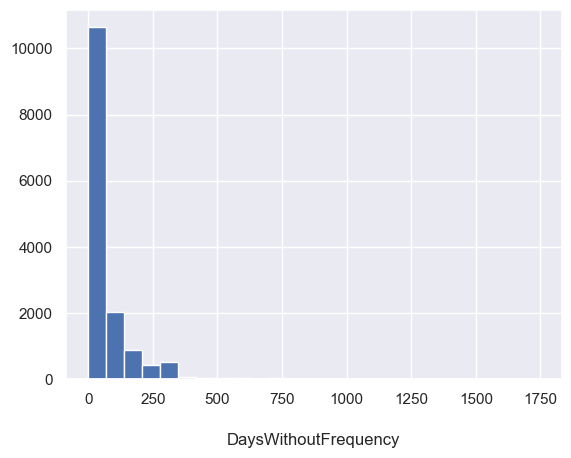

In [389]:
plt.hist(data["DaysWithoutFrequency"], bins=25)  
plt.title("DaysWithoutFrequency", y=-0.2)
plt.show()

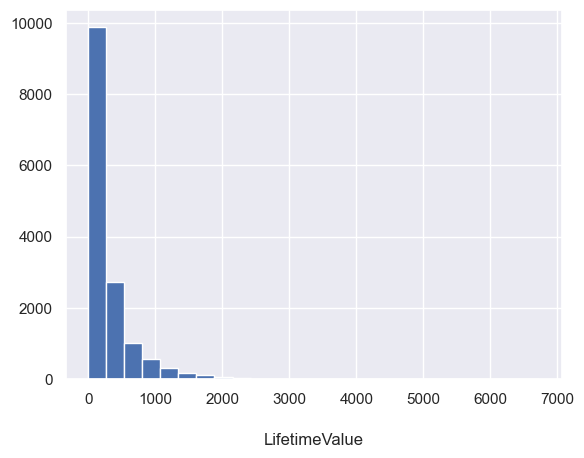

In [390]:
plt.hist(data["LifetimeValue"], bins=25)  
plt.title("LifetimeValue", y=-0.2)
plt.show()

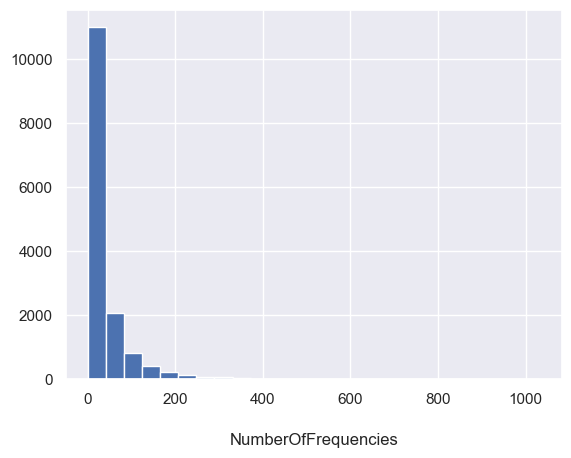

In [391]:
plt.hist(data["NumberOfFrequencies"], bins=25)  
plt.title("NumberOfFrequencies", y=-0.2)
plt.show()

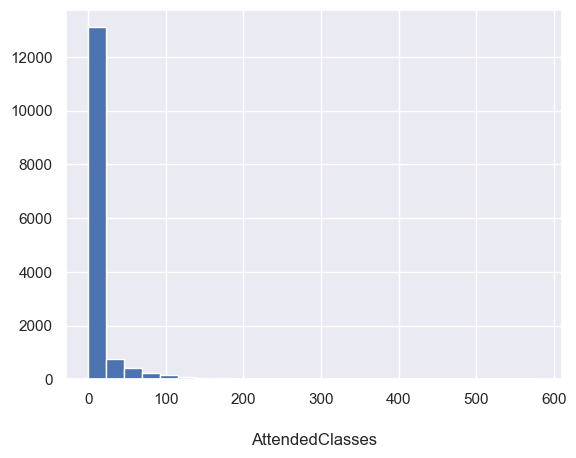

In [392]:
plt.hist(data["AttendedClasses"], bins=25)  
plt.title("AttendedClasses", y=-0.2)
plt.show()

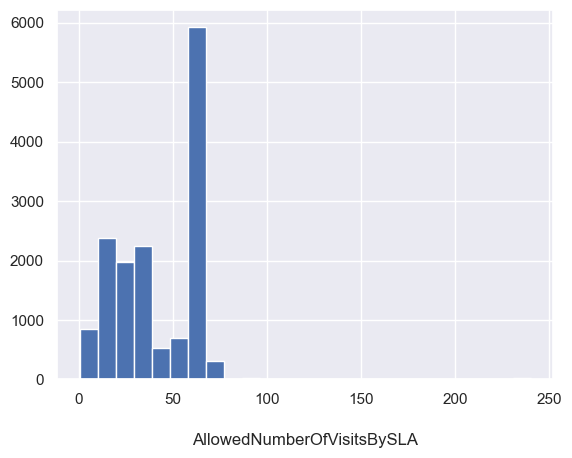

In [393]:
plt.hist(data["AllowedNumberOfVisitsBySLA"], bins=25)  
plt.title("AllowedNumberOfVisitsBySLA", y=-0.2)
plt.show()           # this one is a bit weird, not ideal data

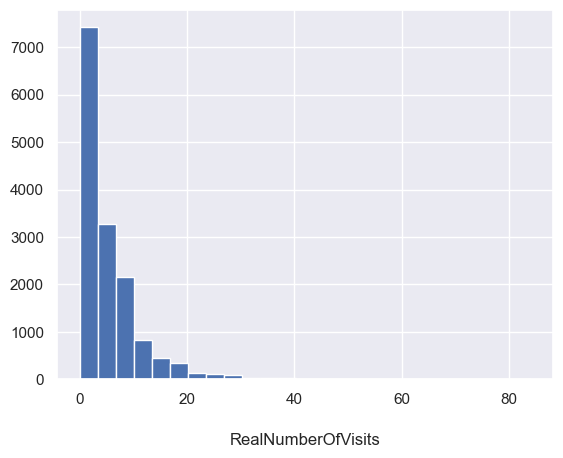

In [394]:
plt.hist(data["RealNumberOfVisits"], bins=25)  
plt.title("RealNumberOfVisits", y=-0.2)
plt.show()

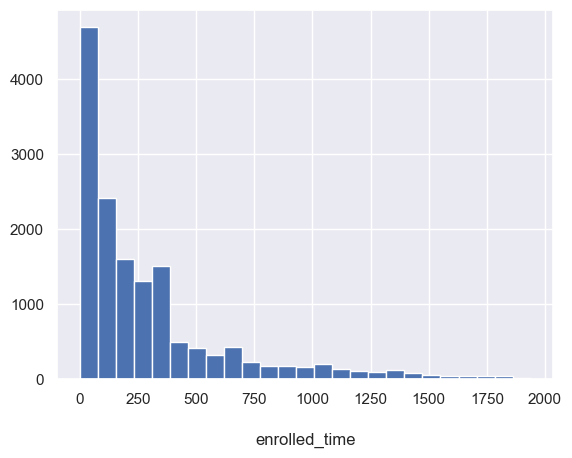

In [395]:
plt.hist(data["enrolled_time"], bins=25)  
plt.title("enrolled_time", y=-0.2)
plt.show()

In [396]:
# Removing outliers 'by hand':

In [397]:
data_1 = data.copy()

filters1 = (
    (data_1["Income"] < 9000)          # histogram above somewhere
    & (data_1["DaysWithoutFrequency"] < 500)
    & (data_1["LifetimeValue"] < 2500)
    & (data_1["NumberOfFrequencies"] < 350)
    & (data_1["AttendedClasses"] < 170)
    & (data_1["AllowedNumberOfVisitsBySLA"] < 85)
    & (data_1["RealNumberOfVisits"] < 38)
    & (data_1["enrolled_time"] < 1800)
)

data_1 = data[filters1]

print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9595


In [398]:
# data kept should be like at least like 96%, teacher said in class. Extending the values so that that parameter is met

In [399]:
# Using the IQR method (more brute force):  (data is not changed)

In [400]:
data_2 = data.copy()

features_chosen = ["Income","DaysWithoutFrequency","LifetimeValue","NumberOfFrequencies","AttendedClasses",
                  "AllowedNumberOfVisitsBySLA","RealNumberOfVisits","enrolled_time"]

# Calculate Q1, Q3, IQR
q25 = data[features_chosen].quantile(.25)
q75 = data[features_chosen].quantile(.75)
iqr = q75 - q25

# Compute upper and lower limit
upper_lim = q75 + 1.5*iqr
lower_lim = q25 - 1.5*iqr


filters2 = []
for features in features_chosen:
    llim = lower_lim[features]
    ulim = upper_lim[features]
    filters2.append(data[features].between(llim, ulim, inclusive='both'))

filters2 = np.all(filters2, 0)
data_2 = data[filters2]

print('Percentage of data kept after removing outliers:', np.round(data_2.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.549


In [401]:
data_3 = data[(filters1 | filters2)]       # remove observations that are outliers in both cases

print('Percentage of data kept after removing outliers:', np.round(data_3.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9609


In [402]:
data = data_3

In [403]:
data.head(8)

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,laziness_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.0,1.0,5500.0,1.0,89.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,7.0,6.28,2.0,0.0,0.0,0.0,1.0,58.0,183.0,0.681529
1,29.0,1.0,2630.0,60.0,479.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1.0,2.0,17.42,1.0,2.0,0.0,1.0,1568.0,398.0,364.0,0.942595
2,23.0,0.0,1980.0,7.0,37.60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,30.03,6.0,0.0,0.0,1.0,889.0,30.0,180.0,0.800200
3,9.0,0.0,0.0,22.0,155.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,2.0,2.0,17.72,3.0,0.0,0.0,1.0,283.0,160.0,364.0,0.830700
4,35.0,0.0,4320.0,210.0,373.20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,7.0,60.97,0.0,3.0,0.0,1.0,721.0,778.0,180.0,1.000000
5,24.0,1.0,2220.0,3.0,140.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,7.0,59.01,26.0,0.0,0.0,1.0,1190.0,243.0,365.0,0.559397
6,23.0,0.0,2340.0,16.0,143.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,7.0,30.03,3.0,3.0,0.0,1.0,219.0,1283.0,180.0,0.900100
7,23.0,0.0,1910.0,99.0,233.90,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,7.0,60.97,11.0,5.0,0.0,1.0,191.0,1589.0,180.0,0.819583


In [404]:
data['Dropout'].value_counts()      # class is imbalanced, watch out in model prediction

Dropout
1.0    11606
0.0     2752
Name: count, dtype: int64

In [405]:
   ### CORRELATION MATRIX ### CORRELATION MATRIX ### CORRELATION MATRIX ###

In [406]:
data.corr()

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,laziness_index
Age,1.000000,0.026876,0.880152,0.031978,-0.070833,0.069956,0.019736,-0.212568,0.237333,-0.106434,-0.020687,-0.036244,0.226529,0.026379,0.125332,-0.194682,0.312610,0.273475,0.103569,0.000423,-0.088848,0.043323,0.006601,0.041392,-0.001065,0.058019
Gender,0.026876,1.000000,0.030806,0.034367,-0.080971,-0.034279,-0.023263,-0.002362,0.104758,-0.092527,-0.021688,-0.114596,-0.026134,0.034094,-0.090154,-0.018407,0.004491,-0.020383,-0.056654,-0.065098,-0.000022,0.027245,0.044520,-0.038216,-0.012801,0.037986
Income,0.880152,0.030806,1.000000,0.025431,-0.107265,0.076410,0.006286,-0.220860,0.268762,-0.141759,-0.026886,-0.030609,0.179944,0.027979,0.093282,-0.220231,0.327137,0.278125,0.099267,-0.026537,-0.098707,0.058611,0.027328,0.029303,-0.004069,0.063277
DaysWithoutFrequency,0.031978,0.034367,0.025431,1.000000,-0.099760,0.095620,0.013123,-0.061054,-0.000697,0.041320,0.033130,0.031961,-0.017775,0.028360,-0.174143,-0.107987,0.012011,-0.009829,-0.281284,0.073882,0.033842,0.216940,0.461272,0.193139,0.044232,0.291321
LifetimeValue,-0.070833,-0.080971,-0.107265,-0.099760,1.000000,0.032671,-0.004961,0.371447,-0.307606,0.119958,0.031978,0.007393,0.074664,-0.012324,0.680935,0.684029,-0.338017,-0.161395,0.054076,0.709793,0.189624,-0.328863,-0.332588,0.317262,-0.005101,-0.136983
UseByTime,0.069956,-0.034279,0.076410,0.095620,0.032671,1.000000,0.008962,-0.008182,0.066106,-0.028825,-0.020671,-0.017312,0.013163,-0.009160,0.100209,-0.054188,0.109528,0.064233,0.042220,0.114498,-0.011191,0.106802,-0.051989,0.288631,-0.008274,0.001285
AthleticsActivities,0.019736,-0.023263,0.006286,0.013123,-0.004961,0.008962,1.000000,-0.030934,-0.072747,-0.002044,-0.013138,-0.016274,-0.013377,-0.003550,0.006930,-0.016720,0.013532,0.024360,-0.010921,0.024509,0.010031,-0.008927,-0.025853,0.006244,-0.002570,0.023600
WaterActivities,-0.212568,-0.002362,-0.220860,-0.061054,0.371447,-0.008182,-0.030934,1.000000,-0.617792,-0.074595,-0.078866,-0.166907,-0.054073,-0.023121,0.124955,0.410646,-0.494557,-0.316438,-0.051443,0.215754,0.127522,-0.185886,-0.200506,0.068010,0.052964,-0.167157
FitnessActivities,0.237333,0.104758,0.268762,-0.000697,-0.307606,0.066106,-0.072747,-0.617792,1.000000,-0.243358,-0.147259,-0.257170,-0.059292,-0.042113,-0.007118,-0.354885,0.569295,0.313248,0.167790,-0.130926,-0.105918,0.159672,0.119323,0.004201,-0.138342,0.076271
TeamActivities,-0.106434,-0.092527,-0.141759,0.041320,0.119958,-0.028825,-0.002044,-0.074595,-0.243358,1.000000,-0.010377,-0.047340,-0.023542,-0.009976,-0.019224,0.102795,-0.212915,-0.138605,-0.094771,0.090279,0.029949,-0.064565,-0.071443,0.034370,0.024009,0.058343


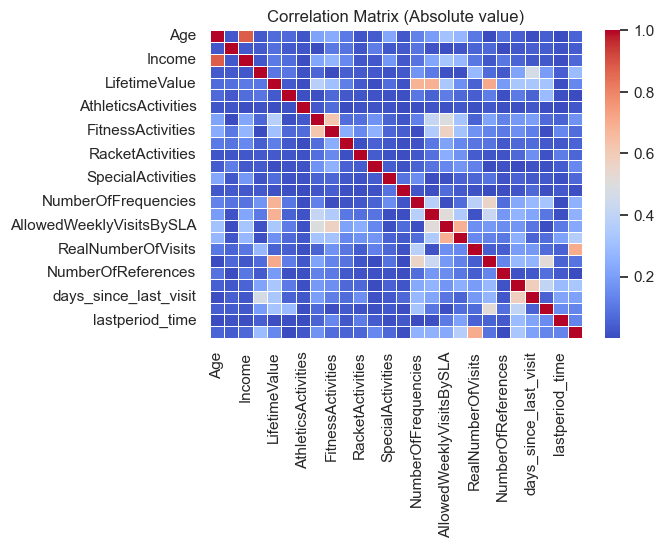

In [407]:
corr_matrix = np.abs(data.corr())

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Absolute value)")
plt.show()

In [408]:
# Remove irrelevant features:

# Gender, Income, dayswithoutfrequency, UseByTime, from activities keep fitness, 
# numberoffrequencies, AllowedNumberOfVisitsBySLA, NumberOfReferences, days_since_last_visit,
# lastperiod_time

In [409]:
#data_2 = data.drop(["Gender","Income","DaysWithoutFrequency","UseByTime","AthleticsActivities","WaterActivities",
                #"TeamActivities","RacketActivities","CombatActivities","SpecialActivities","OtherActivities",
                #"NumberOfFrequencies","AllowedNumberOfVisitsBySLA","NumberOfReferences","days_since_last_visit",
                #"lastperiod_time"], axis=1)

In [410]:
# FINDING BEST FEATURES FOR CLUSTERING DATA
# K-means is very affected by outliers
# unsupervised learning (no target variable)

In [411]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

In [412]:
data_normalized.head(8)

,Age,Gender,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,NumberOfReferences,Dropout,days_since_last_visit,enrolled_time,lastperiod_time,laziness_index
0,0.689655,1.0,0.612472,0.002004,0.037640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.023055,0.041420,1.000000,0.058472,0.054054,0.000000,0.0,0.0,0.000514,0.032240,0.008197,0.853617
1,0.333333,1.0,0.292873,0.120240,0.201870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.063401,0.005917,0.166667,0.175415,0.027027,0.333333,0.0,1.0,0.805755,0.221234,0.502732,0.973614
2,0.264368,0.0,0.220490,0.014028,0.015840,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.014409,0.000000,1.000000,0.307789,0.162162,0.000000,0.0,1.0,0.456835,0.016676,0.000000,0.908163
3,0.103448,0.0,0.000000,0.044088,0.065465,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.054755,0.011834,0.166667,0.178564,0.081081,0.000000,0.0,1.0,0.145427,0.088938,0.502732,0.922182
4,0.402299,0.0,0.481069,0.420842,0.157216,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.115274,0.000000,1.000000,0.632585,0.000000,0.500000,0.0,1.0,0.370504,0.432462,0.000000,1.000000
5,0.275862,1.0,0.247216,0.006012,0.058977,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.077810,0.000000,1.000000,0.612009,0.702703,0.000000,0.0,1.0,0.611511,0.135075,0.505464,0.797480
6,0.264368,0.0,0.260579,0.032064,0.060452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.060519,0.000000,1.000000,0.307789,0.081081,0.500000,0.0,1.0,0.112539,0.713174,0.000000,0.954082
7,0.264368,0.0,0.212695,0.198397,0.098534,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.095101,0.000000,1.000000,0.632585,0.297297,0.833333,0.0,1.0,0.098150,0.883268,0.000000,0.917073


In [414]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

variance_threshold = VarianceThreshold(threshold=0.05)  # Adjust the threshold as needed
selected_data = variance_threshold.fit_transform(data_normalized)

In [ ]:
# Not the best for this. need to think about it

C:\Users\jaime\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaime\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

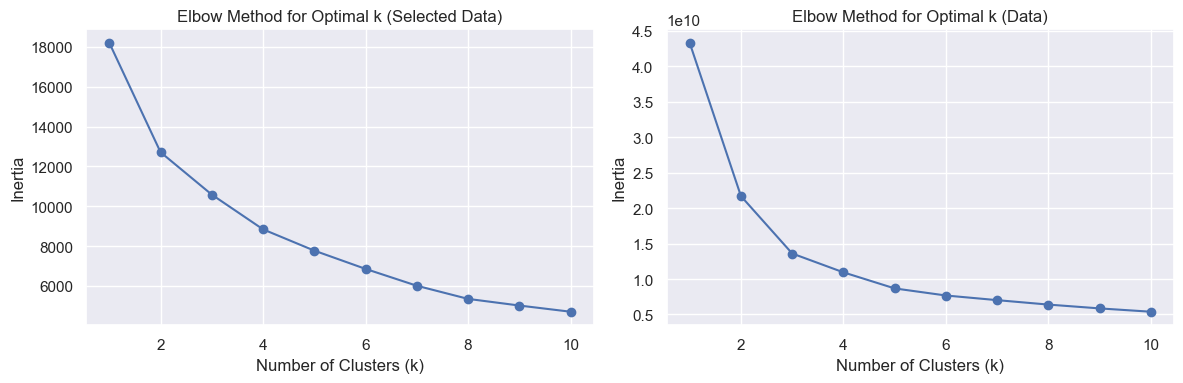

In [415]:
selected_inertias = []
data_inertias = []

# Elbow method for selected_data
for k in range(1, 11):
    kmeans_selected = KMeans(n_clusters=k, random_state=42)
    kmeans_selected.fit(selected_data)
    selected_inertias.append(kmeans_selected.inertia_)

# Elbow method for data
for k in range(1, 11):
    kmeans_data = KMeans(n_clusters=k, random_state=42)
    kmeans_data.fit(data)
    data_inertias.append(kmeans_data.inertia_)

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot for selected_data
axs[0].plot(range(1, 11), selected_inertias, marker='o')
axs[0].set_title('Elbow Method for Optimal k (Selected Data)')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia')

# Plot for data
axs[1].plot(range(1, 11), data_inertias, marker='o')
axs[1].set_title('Elbow Method for Optimal k (Data)')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

In [135]:
# Silhouette score closer to 1 indicates good cluster separation. closer to 0 means more overlapping

In [416]:
selected_data = pd.DataFrame(selected_data)

#original_feature_names = data.columns.tolist()
#selected_data_df = pd.DataFrame(selected_data, columns=original_feature_names)

selected_data.head(8)

# you can have the variables the create the best clusters but if they don't give useful information
# it's not useful -> discuss

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000514,0.008197
1,1.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.805755,0.502732
2,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.456835,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.166667,1.0,0.145427,0.502732
4,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.370504,0.000000
5,1.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.611511,0.505464
6,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.112539,0.000000
7,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.098150,0.000000


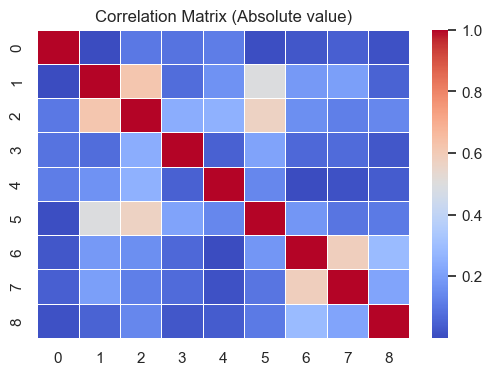

In [417]:
corr_matrix = np.abs(selected_data.corr())

# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Absolute value)")
plt.show()

In [418]:
# Making dropout the target variable:

In [419]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Assuming 'target_column' is the name of your target variable column
target_column = 'Dropout'

# Select the top 4 features with the highest mutual information scores
X = data.drop(target_column, axis=1)  
y = data[target_column]  # Target variable

selector = SelectKBest(score_func=mutual_info_classif, k=4)
X_new = selector.fit_transform(X, y)

# Get the indices of the top 4 features with the highest scores
top_feature_indices = selector.scores_.argsort()[-4:][::-1]

# Get the names of the top 4 features with the highest scores
top_features = X.columns[top_feature_indices]

print("Top 4 features with the highest scores:", top_features)

data_dropout = data[top_features].copy()
data_dropout['Dropout'] = data['Dropout']       # data_dropout is the datframe for this line of thought

Top 4 features with the highest scores: Index(['enrolled_time', 'days_since_last_visit', 'DaysWithoutFrequency',
       'lastperiod_time'],
      dtype='object')


In [420]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X = data_dropout.drop(['Dropout'], axis = 1)
y = data_dropout['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y)

# Check if stratify is working
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()
print("Training Set Class Distribution:")
print(train_class_distribution)
print("\nTesting Set Class Distribution:")
print(test_class_distribution)


log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
f1

# This seems to good to be true, can you see if something is wrong

Training Set Class Distribution:
Dropout
1.0    8124
0.0    1926
Name: count, dtype: int64

Testing Set Class Distribution:
Dropout
1.0    3482
0.0     826
Name: count, dtype: int64


0.9989938191749318